In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib.colors import BoundaryNorm, ListedColormap


### kruskall-wallis h test ehk one-way anova

In [3]:
# stats.f_oneway

In [4]:
columns = ['noun', 'adj', 'propn', 'adv', 'intj', 'cconj', 'sconj', 'adp', 'det', 'num', 'punct', 'symbol', 'pron', 'abbr', 'TTR', 'avg_word_len', 'avr_sent_len', 'hapax_legomena', 'coref', 'see_pron', 'see_det', '1st_pron', '2nd_pron', '3rd_pron', 'active_voice', 'passive_voice', '1st_prs_verb', '2nd_prs_verb', '3rd_prs_verb', 'core_verb', 'verbtype_ratio', 'da_inf', 'gerund', 'supine', 'verb_particle', 'discourse', 'pres_tense', 'past_tense', 'ind_mood', 'cond_mood', 'imp_mood', 'quot_mood', 'neg_polarity', 'nom_case', 'gen_case', 'part_case', 'ill_case', 'ine_case', 'ela_case', 'alla_case', 'ade_case', 'abl_case', 'tra_case', 'ter_case', 'ess_case', 'abe_case', 'com_case', 'nsubj', 'nsubj_cop', 'modal', 'acl:relc', 'csubj', 'csubj_cop', 'obj', 'ccomp', 'xcomp', 'obl', 'nmod', 'appos', 'nummod', 'amod', 'advcl', 'voc', 'cop', 'conj', 'cc', 'yneemid', 'emoticons']

def get_data(f):
    ls = []
    with open(f, 'r') as fid:
        reader = csv.reader(fid)
        next(reader)
        for r in reader:
            ls.append(r[0].split(';')[1:])
    return np.array(ls)

In [5]:
def per_dimension(strong, weak, not_present):
    f_statistic, p_value = stats.f_oneway(strong, weak, not_present)
    i = 1
    no_difference = []
    for feature, f, p in zip(columns, f_statistic.tolist(), p_value.tolist()):
        if p <= 0.05:
            print(f'({i}) Tunnus: {feature}; f-statistik {round(f, 3)}; p-väärtus: {round(p, 5)}')
            i+=1
        else:
            no_difference.append(feature)
    print(f'\n{len(no_difference)}: {no_difference}')  

        

### INSTRUEERIVUS

In [6]:

strong = get_data('dimensioonide_grupid/inst/inst_strong.csv')
weak = get_data('dimensioonide_grupid/inst/inst_weak.csv')
not_present = get_data('dimensioonide_grupid/inst/inst_not_present.csv')
per_dimension(strong, weak, not_present)


(1) Tunnus: noun; f-statistik 3.263; p-väärtus: 0.04293
(2) Tunnus: propn; f-statistik 3.522; p-väärtus: 0.03378
(3) Tunnus: avg_word_len; f-statistik 3.42; p-väärtus: 0.03712
(4) Tunnus: avr_sent_len; f-statistik 4.323; p-väärtus: 0.01619
(5) Tunnus: 2nd_prs_verb; f-statistik 10.201; p-väärtus: 0.0001
(6) Tunnus: 3rd_prs_verb; f-statistik 9.851; p-väärtus: 0.00014
(7) Tunnus: da_inf; f-statistik 5.55; p-väärtus: 0.00537
(8) Tunnus: gerund; f-statistik 5.507; p-väärtus: 0.00558
(9) Tunnus: pres_tense; f-statistik 11.903; p-väärtus: 3e-05
(10) Tunnus: past_tense; f-statistik 7.198; p-väärtus: 0.00127
(11) Tunnus: ind_mood; f-statistik 4.61; p-väärtus: 0.01247
(12) Tunnus: imp_mood; f-statistik 9.147; p-väärtus: 0.00025
(13) Tunnus: gen_case; f-statistik 3.61; p-väärtus: 0.03114
(14) Tunnus: part_case; f-statistik 3.658; p-väärtus: 0.02978
(15) Tunnus: nsubj; f-statistik 6.471; p-väärtus: 0.00239
(16) Tunnus: modal; f-statistik 4.144; p-väärtus: 0.01906
(17) Tunnus: csubj; f-statistik 3.

### ABSTRAKTSUS

In [7]:
strong = get_data('dimensioonide_grupid/abs/abs_strong.csv')
weak = get_data('dimensioonide_grupid/abs/abs_weak.csv')
not_present = get_data('dimensioonide_grupid/abs/abs_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 3.522; p-väärtus: 0.03351
(2) Tunnus: adv; f-statistik 3.814; p-väärtus: 0.02556
(3) Tunnus: punct; f-statistik 3.173; p-väärtus: 0.04641
(4) Tunnus: pron; f-statistik 4.375; p-väärtus: 0.01525
(5) Tunnus: hapax_legomena; f-statistik 4.778; p-väärtus: 0.01057
(6) Tunnus: coref; f-statistik 4.284; p-väärtus: 0.01658
(7) Tunnus: see_pron; f-statistik 4.008; p-väärtus: 0.02136
(8) Tunnus: core_verb; f-statistik 4.072; p-väärtus: 0.02014
(9) Tunnus: neg_polarity; f-statistik 4.539; p-väärtus: 0.01313
(10) Tunnus: ade_case; f-statistik 3.782; p-väärtus: 0.02633
(11) Tunnus: nsubj_cop; f-statistik 3.136; p-väärtus: 0.04804
(12) Tunnus: modal; f-statistik 4.521; p-väärtus: 0.01334
(13) Tunnus: csubj_cop; f-statistik 4.519; p-väärtus: 0.01338
(14) Tunnus: obl; f-statistik 8.723; p-väärtus: 0.00033
(15) Tunnus: nummod; f-statistik 3.677; p-väärtus: 0.029
(16) Tunnus: amod; f-statistik 3.795; p-väärtus: 0.026
(17) Tunnus: cop; f-statistik 5.271; p-väärtus: 0.00677



### AFEKTIIVSUS

In [8]:
strong = get_data('dimensioonide_grupid/afek/afek_strong.csv')
weak = get_data('dimensioonide_grupid/afek/afek_weak.csv')
not_present = get_data('dimensioonide_grupid/afek/afek_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 37.7; p-väärtus: 0.0
(2) Tunnus: adj; f-statistik 6.629; p-väärtus: 0.00208
(3) Tunnus: propn; f-statistik 11.015; p-väärtus: 5e-05
(4) Tunnus: adv; f-statistik 37.565; p-väärtus: 0.0
(5) Tunnus: intj; f-statistik 7.856; p-väärtus: 0.00073
(6) Tunnus: sconj; f-statistik 18.044; p-väärtus: 0.0
(7) Tunnus: det; f-statistik 4.952; p-väärtus: 0.00917
(8) Tunnus: num; f-statistik 5.12; p-väärtus: 0.00788
(9) Tunnus: punct; f-statistik 3.72; p-väärtus: 0.02813
(10) Tunnus: pron; f-statistik 28.21; p-väärtus: 0.0
(11) Tunnus: abbr; f-statistik 7.273; p-väärtus: 0.00119
(12) Tunnus: TTR; f-statistik 3.308; p-väärtus: 0.04118
(13) Tunnus: avg_word_len; f-statistik 29.686; p-väärtus: 0.0
(14) Tunnus: avr_sent_len; f-statistik 5.72; p-väärtus: 0.00462
(15) Tunnus: hapax_legomena; f-statistik 3.419; p-väärtus: 0.03715
(16) Tunnus: coref; f-statistik 21.713; p-väärtus: 0.0
(17) Tunnus: see_pron; f-statistik 8.059; p-väärtus: 0.00061
(18) Tunnus: 1st_pron; f-statistik 1

### AEG

In [9]:
strong = get_data('dimensioonide_grupid/aeg/aeg_strong.csv')
weak = get_data('dimensioonide_grupid/aeg/aeg_weak.csv')
not_present = get_data('dimensioonide_grupid/aeg/aeg_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: propn; f-statistik 3.712; p-väärtus: 0.0293
(2) Tunnus: num; f-statistik 9.485; p-väärtus: 0.00022
(3) Tunnus: TTR; f-statistik 3.204; p-väärtus: 0.04652
(4) Tunnus: verbtype_ratio; f-statistik 6.583; p-väärtus: 0.00238
(5) Tunnus: da_inf; f-statistik 7.327; p-väärtus: 0.00128
(6) Tunnus: pres_tense; f-statistik 11.173; p-väärtus: 6e-05
(7) Tunnus: past_tense; f-statistik 12.594; p-väärtus: 2e-05
(8) Tunnus: part_case; f-statistik 3.364; p-väärtus: 0.0402
(9) Tunnus: ter_case; f-statistik 3.258; p-väärtus: 0.04427
(10) Tunnus: obl; f-statistik 8.504; p-väärtus: 0.00049
(11) Tunnus: nummod; f-statistik 9.719; p-väärtus: 0.00019
(12) Tunnus: advcl; f-statistik 5.598; p-väärtus: 0.00553

66: ['noun', 'adj', 'adv', 'intj', 'cconj', 'sconj', 'adp', 'det', 'punct', 'symbol', 'pron', 'abbr', 'avg_word_len', 'avr_sent_len', 'hapax_legomena', 'coref', 'see_pron', 'see_det', '1st_pron', '2nd_pron', '3rd_pron', 'active_voice', 'passive_voice', '1st_prs_verb', '2nd_prs_verb', '3rd_prs_

### ARGUMENTATIIVSUS

In [10]:
strong = get_data('dimensioonide_grupid/arg/arg_strong.csv')
weak = get_data('dimensioonide_grupid/arg/arg_weak.csv')
not_present = get_data('dimensioonide_grupid/arg/arg_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: propn; f-statistik 9.178; p-väärtus: 0.00027
(2) Tunnus: pron; f-statistik 5.775; p-väärtus: 0.00463
(3) Tunnus: hapax_legomena; f-statistik 3.718; p-väärtus: 0.02881
(4) Tunnus: coref; f-statistik 6.115; p-väärtus: 0.00345
(5) Tunnus: see_pron; f-statistik 6.829; p-väärtus: 0.00187
(6) Tunnus: 1st_pron; f-statistik 4.425; p-väärtus: 0.01522
(7) Tunnus: verbtype_ratio; f-statistik 4.443; p-väärtus: 0.01497
(8) Tunnus: da_inf; f-statistik 9.352; p-väärtus: 0.00023
(9) Tunnus: pres_tense; f-statistik 11.209; p-väärtus: 5e-05
(10) Tunnus: past_tense; f-statistik 8.044; p-väärtus: 0.00068
(11) Tunnus: cond_mood; f-statistik 5.346; p-väärtus: 0.00672
(12) Tunnus: neg_polarity; f-statistik 8.821; p-väärtus: 0.00036
(13) Tunnus: nom_case; f-statistik 3.946; p-väärtus: 0.02343
(14) Tunnus: ade_case; f-statistik 3.532; p-väärtus: 0.03414
(15) Tunnus: modal; f-statistik 6.814; p-väärtus: 0.0019
(16) Tunnus: csubj; f-statistik 3.312; p-väärtus: 0.04177
(17) Tunnus: obl; f-statistik 6.

/home/kristiina/.virtualenvs/limesurvey/lib/python3.8/site-packages/scipy/stats/_stats_py.py:3659: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


### FORMAALSUS

In [11]:
strong = get_data('dimensioonide_grupid/form/form_strong.csv')
weak = get_data('dimensioonide_grupid/form/form_weak.csv')
not_present = get_data('dimensioonide_grupid/form/form_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 20.54; p-väärtus: 0.0
(2) Tunnus: adj; f-statistik 11.029; p-väärtus: 5e-05
(3) Tunnus: propn; f-statistik 9.911; p-väärtus: 0.00013
(4) Tunnus: adv; f-statistik 25.179; p-väärtus: 0.0
(5) Tunnus: sconj; f-statistik 6.052; p-väärtus: 0.00345
(6) Tunnus: det; f-statistik 7.901; p-väärtus: 0.0007
(7) Tunnus: num; f-statistik 6.927; p-väärtus: 0.00161
(8) Tunnus: punct; f-statistik 14.03; p-väärtus: 1e-05
(9) Tunnus: pron; f-statistik 14.818; p-väärtus: 0.0
(10) Tunnus: abbr; f-statistik 8.478; p-väärtus: 0.00043
(11) Tunnus: avg_word_len; f-statistik 38.46; p-väärtus: 0.0
(12) Tunnus: avr_sent_len; f-statistik 9.472; p-väärtus: 0.00019
(13) Tunnus: coref; f-statistik 10.487; p-väärtus: 8e-05
(14) Tunnus: see_pron; f-statistik 5.837; p-väärtus: 0.00416
(15) Tunnus: see_det; f-statistik 3.595; p-väärtus: 0.03158
(16) Tunnus: 1st_pron; f-statistik 5.804; p-väärtus: 0.00429
(17) Tunnus: 2nd_pron; f-statistik 4.466; p-väärtus: 0.01422
(18) Tunnus: 3rd_pron; f-sta

### IMPERSONAALSUS

In [12]:
strong = get_data('dimensioonide_grupid/imp/imp_strong.csv')
weak = get_data('dimensioonide_grupid/imp/imp_weak.csv')
not_present = get_data('dimensioonide_grupid/imp/imp_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 35.81; p-väärtus: 0.0
(2) Tunnus: adj; f-statistik 8.923; p-väärtus: 0.00031
(3) Tunnus: propn; f-statistik 3.326; p-väärtus: 0.04077
(4) Tunnus: adv; f-statistik 15.646; p-väärtus: 0.0
(5) Tunnus: intj; f-statistik 4.458; p-väärtus: 0.01449
(6) Tunnus: sconj; f-statistik 7.397; p-väärtus: 0.00111
(7) Tunnus: det; f-statistik 6.591; p-väärtus: 0.00221
(8) Tunnus: pron; f-statistik 26.222; p-väärtus: 0.0
(9) Tunnus: abbr; f-statistik 9.289; p-väärtus: 0.00023
(10) Tunnus: avg_word_len; f-statistik 22.252; p-väärtus: 0.0
(11) Tunnus: coref; f-statistik 21.101; p-väärtus: 0.0
(12) Tunnus: see_det; f-statistik 3.496; p-väärtus: 0.03485
(13) Tunnus: 1st_pron; f-statistik 14.465; p-väärtus: 0.0
(14) Tunnus: 2nd_pron; f-statistik 4.48; p-väärtus: 0.0142
(15) Tunnus: 3rd_pron; f-statistik 9.915; p-väärtus: 0.00014
(16) Tunnus: active_voice; f-statistik 13.502; p-väärtus: 1e-05
(17) Tunnus: passive_voice; f-statistik 6.82; p-väärtus: 0.00181
(18) Tunnus: 1st_prs_ve

### INFOTIHEDUS

In [13]:
strong = get_data('dimensioonide_grupid/info/info_strong.csv')
weak = get_data('dimensioonide_grupid/info/info_weak.csv')
not_present = get_data('dimensioonide_grupid/info/info_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 8.123; p-väärtus: 0.00065
(2) Tunnus: adj; f-statistik 3.144; p-väärtus: 0.04901
(3) Tunnus: propn; f-statistik 3.363; p-väärtus: 0.04007
(4) Tunnus: adv; f-statistik 8.671; p-väärtus: 0.00042
(5) Tunnus: intj; f-statistik 3.676; p-väärtus: 0.03012
(6) Tunnus: sconj; f-statistik 6.325; p-väärtus: 0.00293
(7) Tunnus: det; f-statistik 5.06; p-väärtus: 0.00875
(8) Tunnus: num; f-statistik 9.93; p-väärtus: 0.00015
(9) Tunnus: pron; f-statistik 13.581; p-väärtus: 1e-05
(10) Tunnus: avg_word_len; f-statistik 9.775; p-väärtus: 0.00017
(11) Tunnus: coref; f-statistik 8.472; p-väärtus: 0.00049
(12) Tunnus: see_det; f-statistik 3.561; p-väärtus: 0.03345
(13) Tunnus: 1st_pron; f-statistik 9.184; p-väärtus: 0.00028
(14) Tunnus: 2nd_pron; f-statistik 7.925; p-väärtus: 0.00077
(15) Tunnus: active_voice; f-statistik 4.761; p-väärtus: 0.01139
(16) Tunnus: passive_voice; f-statistik 4.984; p-väärtus: 0.00935
(17) Tunnus: 1st_prs_verb; f-statistik 13.405; p-väärtus: 1e-05
(

### INTERAKTIIVSUS

In [14]:
strong = get_data('dimensioonide_grupid/inter/inter_strong.csv')
weak = get_data('dimensioonide_grupid/inter/inter_weak.csv')
not_present = get_data('dimensioonide_grupid/inter/inter_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 14.705; p-väärtus: 0.0
(2) Tunnus: adj; f-statistik 4.834; p-väärtus: 0.00997
(3) Tunnus: propn; f-statistik 5.78; p-väärtus: 0.00425
(4) Tunnus: adv; f-statistik 6.877; p-väärtus: 0.00161
(5) Tunnus: intj; f-statistik 6.112; p-väärtus: 0.00316
(6) Tunnus: sconj; f-statistik 5.064; p-väärtus: 0.00809
(7) Tunnus: num; f-statistik 3.871; p-väärtus: 0.02414
(8) Tunnus: punct; f-statistik 7.612; p-väärtus: 0.00085
(9) Tunnus: pron; f-statistik 18.762; p-väärtus: 0.0
(10) Tunnus: TTR; f-statistik 6.89; p-väärtus: 0.00159
(11) Tunnus: avg_word_len; f-statistik 11.329; p-väärtus: 4e-05
(12) Tunnus: avr_sent_len; f-statistik 3.413; p-väärtus: 0.03696
(13) Tunnus: hapax_legomena; f-statistik 9.791; p-väärtus: 0.00013
(14) Tunnus: coref; f-statistik 16.15; p-väärtus: 0.0
(15) Tunnus: 1st_pron; f-statistik 14.817; p-väärtus: 0.0
(16) Tunnus: 2nd_pron; f-statistik 18.567; p-väärtus: 0.0
(17) Tunnus: 3rd_pron; f-statistik 3.958; p-väärtus: 0.02227
(18) Tunnus: active_v

### KEERULISUS

In [15]:
strong = get_data('dimensioonide_grupid/keer/keer_strong.csv')
weak = get_data('dimensioonide_grupid/keer/keer_weak.csv')
not_present = get_data('dimensioonide_grupid/keer/keer_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 5.498; p-väärtus: 0.0057
(2) Tunnus: adj; f-statistik 4.037; p-väärtus: 0.02119
(3) Tunnus: adv; f-statistik 3.28; p-väärtus: 0.04249
(4) Tunnus: punct; f-statistik 7.119; p-väärtus: 0.00139
(5) Tunnus: pron; f-statistik 5.94; p-väärtus: 0.00386
(6) Tunnus: abbr; f-statistik 24.022; p-väärtus: 0.0
(7) Tunnus: avg_word_len; f-statistik 8.409; p-väärtus: 0.00047
(8) Tunnus: avr_sent_len; f-statistik 3.402; p-väärtus: 0.03795
(9) Tunnus: coref; f-statistik 5.947; p-väärtus: 0.00384
(10) Tunnus: 1st_pron; f-statistik 6.179; p-väärtus: 0.00314
(11) Tunnus: active_voice; f-statistik 5.706; p-väärtus: 0.00475
(12) Tunnus: passive_voice; f-statistik 3.824; p-väärtus: 0.02573
(13) Tunnus: 1st_prs_verb; f-statistik 5.14; p-väärtus: 0.00784
(14) Tunnus: 3rd_prs_verb; f-statistik 3.814; p-väärtus: 0.02597
(15) Tunnus: core_verb; f-statistik 8.515; p-väärtus: 0.00043
(16) Tunnus: gerund; f-statistik 3.745; p-väärtus: 0.02767
(17) Tunnus: supine; f-statistik 4.885; p-vä

### SPONTAANSUS

In [16]:
strong = get_data('dimensioonide_grupid/spont/spont_strong.csv')
weak = get_data('dimensioonide_grupid/spont/spont_weak.csv')
not_present = get_data('dimensioonide_grupid/spont/spont_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 16.992; p-väärtus: 0.0
(2) Tunnus: propn; f-statistik 7.55; p-väärtus: 0.00091
(3) Tunnus: adv; f-statistik 15.962; p-väärtus: 0.0
(4) Tunnus: intj; f-statistik 17.749; p-väärtus: 0.0
(5) Tunnus: punct; f-statistik 3.41; p-väärtus: 0.03718
(6) Tunnus: pron; f-statistik 13.12; p-väärtus: 1e-05
(7) Tunnus: TTR; f-statistik 6.26; p-väärtus: 0.0028
(8) Tunnus: avg_word_len; f-statistik 20.726; p-väärtus: 0.0
(9) Tunnus: avr_sent_len; f-statistik 4.475; p-väärtus: 0.01391
(10) Tunnus: hapax_legomena; f-statistik 4.937; p-väärtus: 0.00914
(11) Tunnus: coref; f-statistik 17.204; p-väärtus: 0.0
(12) Tunnus: 1st_pron; f-statistik 10.903; p-väärtus: 6e-05
(13) Tunnus: 2nd_pron; f-statistik 22.567; p-väärtus: 0.0
(14) Tunnus: active_voice; f-statistik 5.069; p-väärtus: 0.00812
(15) Tunnus: passive_voice; f-statistik 4.199; p-väärtus: 0.01793
(16) Tunnus: 1st_prs_verb; f-statistik 4.443; p-väärtus: 0.01433
(17) Tunnus: core_verb; f-statistik 12.769; p-väärtus: 1e-05
(

### SUBJEKTIIVSUS

In [17]:
strong = get_data('dimensioonide_grupid/subj/subj_strong.csv')
weak = get_data('dimensioonide_grupid/subj/subj_weak.csv')
not_present = get_data('dimensioonide_grupid/subj/subj_not_present.csv')
per_dimension(strong, weak, not_present)

(1) Tunnus: noun; f-statistik 26.399; p-väärtus: 0.0
(2) Tunnus: adj; f-statistik 7.772; p-väärtus: 0.00075
(3) Tunnus: propn; f-statistik 16.715; p-väärtus: 0.0
(4) Tunnus: adv; f-statistik 48.766; p-väärtus: 0.0
(5) Tunnus: intj; f-statistik 4.347; p-väärtus: 0.01565
(6) Tunnus: sconj; f-statistik 6.939; p-väärtus: 0.00155
(7) Tunnus: det; f-statistik 4.674; p-väärtus: 0.01161
(8) Tunnus: punct; f-statistik 6.287; p-väärtus: 0.00274
(9) Tunnus: pron; f-statistik 24.989; p-väärtus: 0.0
(10) Tunnus: abbr; f-statistik 7.09; p-väärtus: 0.00136
(11) Tunnus: TTR; f-statistik 5.501; p-väärtus: 0.0055
(12) Tunnus: avg_word_len; f-statistik 35.047; p-väärtus: 0.0
(13) Tunnus: avr_sent_len; f-statistik 7.129; p-väärtus: 0.00131
(14) Tunnus: hapax_legomena; f-statistik 5.511; p-väärtus: 0.00546
(15) Tunnus: coref; f-statistik 20.171; p-väärtus: 0.0
(16) Tunnus: see_pron; f-statistik 7.611; p-väärtus: 0.00086
(17) Tunnus: 1st_pron; f-statistik 16.742; p-väärtus: 0.0
(18) Tunnus: 2nd_pron; f-stat

## korrelatsioonid

In [13]:
input_f = 'limesurvey_feature_results_w_dims_uus.csv'

data = []

with open(input_f, 'r') as fid:
    csv_reader = csv.DictReader(fid, delimiter=',')
    fieldnames = csv_reader.fieldnames
    for line in csv_reader:
        data.append(line)

In [14]:
initial_df = pd.DataFrame(data).iloc[:, 1:].astype(float)

In [11]:
initial_df

,file_id,abs,afek,aeg,arg,form,imp,info,inst,inter,...,appos,nummod,amod,advcl,voc,cop,conj,cc,yneemid,emoticons
0,arhiiv_koolielu_ee.ela_481254,1.35,0.85,0.65,1.55,0.7,1.8,1.1,0.9,0.45,...,0,0.041916167664671,0.029940119760479,0,0.035928143712575,0.095808383233533,0.047904191616767,0,0,
1,arvamus_postimees_ee.ela_5946,0.65,1.15,0.7,0.65,0.45,0.65,1.15,0.75,0.7,...,0.02013422818792,0.067114093959732,0.023489932885906,0,0.033557046979866,0.033557046979866,0.030201342281879,0,0,
2,arvamusaed_ee.ela_274676,1.25,1.65,0.15,1.5,0.15,0.55,0.35,0.6,0.85,...,0.004329004329004,0.034632034632035,0.038961038961039,0,0.012987012987013,0.038961038961039,0.038961038961039,0,0,
3,arvamusaed_ee.ela_6007,0.6,1.2,0.8,1.85,0.45,1.15,0.65,0.3,0.45,...,0.020979020979021,0.083916083916084,0.034965034965035,0,0.013986013986014,0.034965034965035,0.027972027972028,0,0,
4,bhr_balanss_ee.ela_565106,1.15,0.8,0.4,1.4,0.7,0.75,0.85,0.25,0.2,...,0,0.059782608695652,0.016304347826087,0,0.021739130434783,0.048913043478261,0.032608695652174,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,www_vorumaateataja_ee.ela_241120,0.35,1.25,2.1,0.65,0.15,0.9,0.7,0.75,1.7,...,0,0.040322580645161,0.010752688172043,0,0.024193548387097,0.043010752688172,0.043010752688172,0,0,
116,www_vorumaateataja_ee.ela_494965,0.5,1.4,0.6,1.5,0.55,0.85,1.2,0.4,0.55,...,0.02547770700637,0.044585987261147,0.038216560509554,0,0.02547770700637,0.02547770700637,0.02547770700637,0,0,
117,www_vsport_ee.ela_120496,0.1,0.8,2.6,0.55,0.85,0.95,2.1,0.8,0.65,...,0.028,0.044,0,0,0.012,0.068,0.04,0,0,
118,www_xn--eestimngula-q8a_ee.ela_40079,0.4,0.6,0.35,0.5,0.55,1.6,1.85,2.65,0.7,...,0.035087719298246,0.017543859649123,0,0,0.017543859649123,0.105263157894737,0.06140350877193,0,0,


In [15]:
feature_names = initial_df.columns[12:]
feature_names

Index(['noun', 'adj', 'propn', 'adv', 'intj', 'cconj', 'sconj', 'adp', 'det',
       'num', 'punct', 'symbol', 'pron', 'abbr', 'TTR', 'avg_word_len',
       'avr_sent_len', 'hapax_legomena', 'coref', 'see_pron', 'see_det',
       '1st_pron', '2nd_pron', '3rd_pron', 'active_voice', 'passive_voice',
       '1st_prs_verb', '2nd_prs_verb', '3rd_prs_verb', 'core_verb',
       'verbtype_ratio', 'da_inf', 'gerund', 'supine', 'verb_particle',
       'discourse', 'pres_tense', 'past_tense', 'ind_mood', 'cond_mood',
       'imp_mood', 'quot_mood', 'neg_polarity', 'nom_case', 'gen_case',
       'part_case', 'ill_case', 'ine_case', 'ela_case', 'alla_case',
       'ade_case', 'abl_case', 'tra_case', 'ter_case', 'ess_case', 'abe_case',
       'com_case', 'nsubj', 'nsubj_cop', 'modal', 'acl:relc', 'csubj',
       'csubj_cop', 'obj', 'ccomp', 'xcomp', 'obl', 'nmod', 'appos', 'nummod',
       'amod', 'advcl', 'voc', 'cop', 'conj', 'cc', 'yneemid', 'emoticons'],
      dtype='object')

In [ ]:
def save_csv(prefix, df):
    df.to_csv(f'korrelatsiooni_csvd/{prefix}.csv')

In [ ]:
def plot_important_features(model, dimname):
    
    print(model.coef_)

    feature_importance = abs(model.coef_[0])
    
    
    feature_importance = 1.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure(figsize=(15,20))
    featax = featfig.add_subplot(1, 1, 1)

    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
    featax.set_xlabel(f'Relative Feature Importance {str.upper(dimname)}')

    # plt.tight_layout()   
    plt.show()

In [16]:
def get_corr_pairs(corr_df):

    columns = [line for line in corr_df]
    matches = []

    for column, rows in corr_df.items():
        for m, score in rows.items():
            if (score > 0.75 or score < -0.75) and column != m:
                matches.append([(column, m), score])
            continue

    without_duplicates = []
    for ws, i in matches:
        ls = (sorted(ws), i)
        if ls not in without_duplicates:
            without_duplicates.append(ls)       

    return without_duplicates

In [19]:
def generate_heatmap(dim, corr_data):

    my_colors = ['black', 'lightgrey', 'white', 'red']
    my_cmap = ListedColormap(my_colors)
    bounds = [-1.0, -0.75, 0.75, 1.0]
    my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))



    mask = np.triu(np.ones_like(corr_data))

    fig, ax = plt.subplots(1, 1, figsize=(20,20))
    hmap = sns.heatmap(corr_data,
                yticklabels=1, 
                ax=ax,
                linewidths=1.0,
                cmap=my_cmap,
                norm=my_norm,
                mask=mask,
               cbar_kws = dict(use_gridspec=False,location="top")
               )

    colorbar = ax.collections[0].colorbar
    hmap.figure.savefig(f'heatmapid/{dim}_heatmap.png', format='png', dpi=150)
    plt.show()


In [17]:
all_df = initial_df.iloc[:, 12:]
all_corr = all_df.corr(method='pearson').round(2)

# save_csv('dimensions', all_corr)

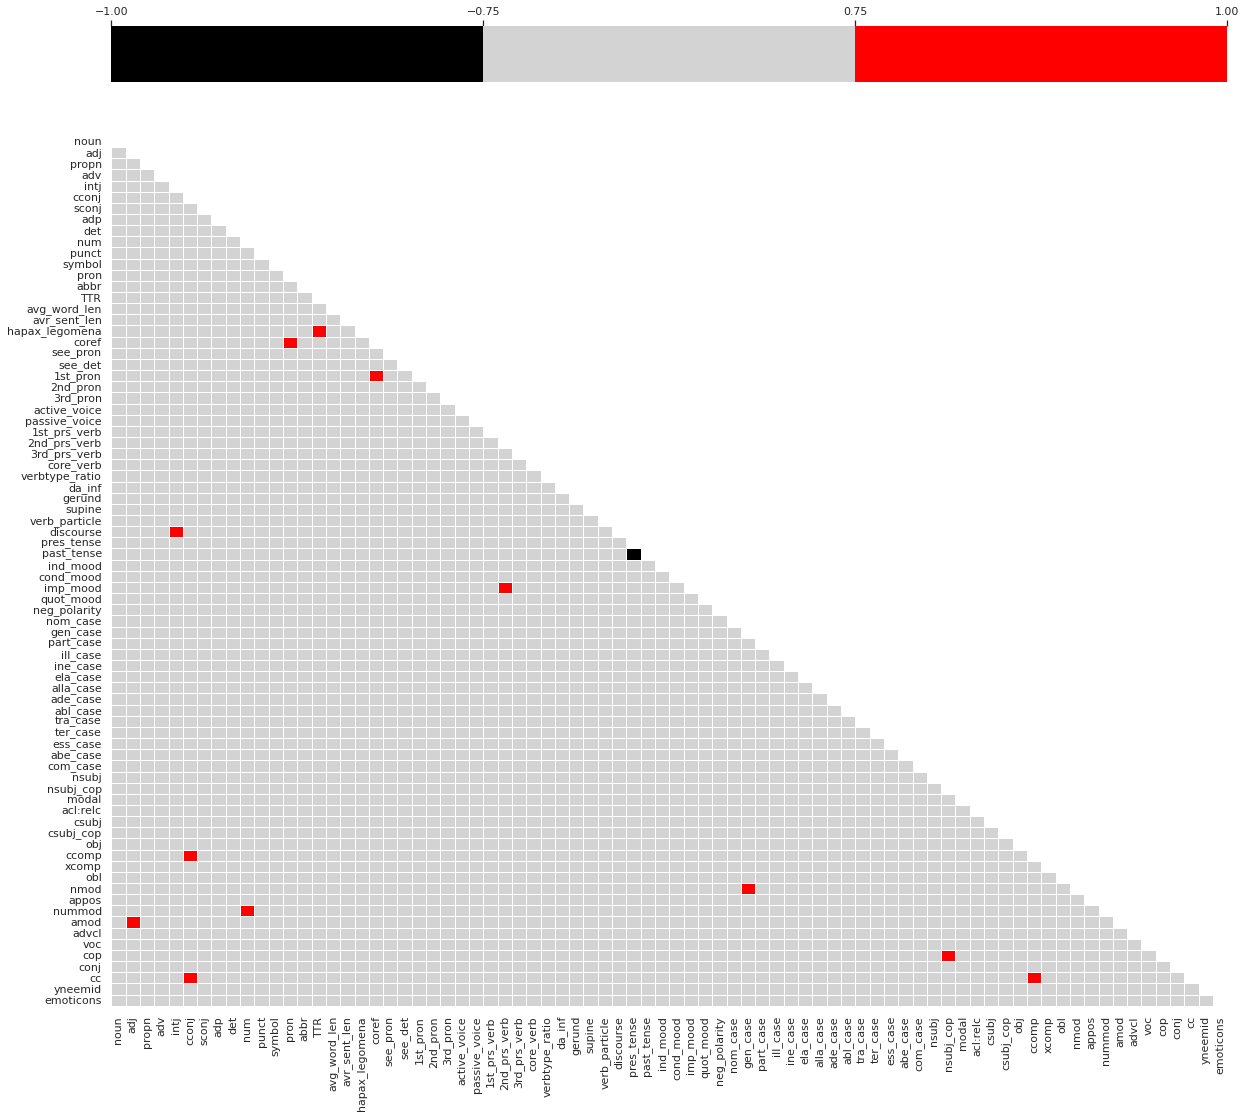

In [20]:
generate_heatmap('all_dims', all_corr)

In [21]:
pairs = get_corr_pairs(all_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')

['adj', 'amod'] = 0.76
['discourse', 'intj'] = 1.0
['ccomp', 'cconj'] = 0.93
['cc', 'cconj'] = 1.0
['num', 'nummod'] = 0.88
['coref', 'pron'] = 0.91
['TTR', 'hapax_legomena'] = 0.83
['1st_pron', 'coref'] = 0.78
['2nd_prs_verb', 'imp_mood'] = 0.98
['past_tense', 'pres_tense'] = -0.77
['gen_case', 'nmod'] = 0.86
['cop', 'nsubj_cop'] = 0.9
['cc', 'ccomp'] = 0.93


## ABSTRAKTNE

In [ ]:
abs_df = initial_df['abs']
abs_df
# initial_df[initial_df['abs']<=1]

In [ ]:
pos, neg = make_new_df('abs')

print(len(pos), len(neg))

In [ ]:
pos

In [ ]:
abs_corr = pos.corr(method='pearson').round(2)
save_csv('abs', abs_corr)
abs_corr


In [ ]:
generate_heatmap('abs', abs_corr)

In [ ]:
pairs = get_corr_pairs(abs_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')


### NORMAALJAOTUS

In [ ]:
def generate_plot(dim, df1, df2, features):
    fig, axs = plt.subplots(ncols=2, figsize=(20, 200))
    plt.subplots_adjust(hspace=0.5)

    for i, feature in enumerate(features):
        df1_mean = np.mean(df1[str(feature)])
        df1_std = np.std(df1[str(feature)])
        pdf1 = stats.norm.pdf(df1[str(feature)].sort_values(), df1_mean, df1_std)
        
        df2_mean = np.mean(df2[str(feature)])
        df2_std = np.std(df2[str(feature)])
        pdf2 = stats.norm.pdf(df2[str(feature)].sort_values(), df2_mean, df2_std)
    
        ax = plt.subplot(40, 2, i+1)
        plt.plot(df1[str(feature)].sort_values(), pdf1, label='>=2')
        plt.plot(df2[str(feature)].sort_values(), pdf2, label='<2')
        plt.legend(loc=1, prop={'size': 20})
        plt.xlabel(str(feature.upper()))

#         plt.savefig(f'normdist_plots/{dim}.pdf')

In [ ]:
generate_plot('abs', pos, neg, feature_names)

### LOGISTILINE REGRESSIOON

In [ ]:
feats = [*feature_names]

In [ ]:
only_abs = initial_df.loc[:, feats + ['abs']].astype('float64')
only_abs['state'] = [1 if score >= 1 else 0 for score in only_abs['abs']]
# print(only_abs)

final_features = only_abs.columns.values.tolist()[:-2]


X = only_abs[final_features]
y = only_abs.state

model = LogisticRegression().fit(X,y)

plot_important_features(model, 'abstraktsus')


In [ ]:

log_reg = smf.logit("state ~ coref + hapax_legomena + noun + nom_case + avg_word_len + past_tense + pres_tense + obl + adv + num + ade_case + nummod + part_case", data=only_abs).fit()
log_reg.summary()

# AFEKTIIVNE

In [ ]:
dim = 'afek'

In [ ]:
pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:


dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)


pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')


generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['afek']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['afek']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'afektiivsus')

In [ ]:
log_reg = smf.logit("state ~ avg_word_len + coref + noun + adv + pron + verbtype_ratio + TTR + punct + active_voice + adj + conj + avr_sent_len", data=df).fit()
log_reg.summary()

## AEG

In [ ]:
dim = 'aeg'
pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)

pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')


generate_plot(dim, pos, neg, feature_names)


In [ ]:
df = initial_df.loc[:, feats + ['aeg']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['aeg']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'aeg')

In [ ]:
log_reg = smf.logit("state ~ coref + past_tense + pres_tense + obl + verbtype_ratio + adv + num + avg_word_len + gen_case + nummod + noun + core_verb + ade_case + propn + da_inf + cop", data=df).fit()
log_reg.summary()

## ARGUMENTATIIVNE

In [ ]:
dim = 'arg'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)


pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')

generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['arg']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['arg']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'arg')



In [ ]:
log_reg = smf.logit("state ~ coref + hapax_legomena + propn + verbtype_ratio + past_tense + pres_tense + avg_word_len + gen_case + conj + TTR + adj + neg_polarity + obl + part_case", data=df).fit()
log_reg.summary()

## FORMAALNE

In [ ]:
dim = 'form'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)

pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')

generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['form']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['form']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'formaalsus')




In [ ]:

log_reg = smf.logit("state ~ avg_word_len + coref + gen_case + noun + obl + adv + nmod + num", data=df).fit()
log_reg.summary()

## IMPERSONAALNE

In [ ]:
dim = 'imp'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)


pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')

generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['imp']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['imp']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'impersonaalsus')





In [ ]:
log_reg = smf.logit("state ~ avg_word_len + coref + noun + past_tense + pres_tense + conj + pron + num", data=df).fit()
log_reg.summary()

## INFO

In [ ]:
dim = 'info'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)


pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')


generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['info']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['info']]

final_features = df.columns.values.tolist()[:-2]

X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'info')


In [ ]:

log_reg = smf.logit("state ~ coref + num + avg_word_len + active_voice + propn + nummod + pron + ind_mood + hapax_legomena + nsubj", data=df).fit()
log_reg.summary()

## INSTRUEERIV

In [ ]:
dim = 'inst'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)


pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')

generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['inst']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['inst']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'instrueerivus')


In [ ]:
log_reg = smf.logit("state ~ coref + pres_tense + nom_case + pron + hapax_legomena + past_tense + verbtype_ratio + noun + third_prs_verb + second_prs_verb + imp_mood + pron", data=df).fit()
log_reg.summary()

## INTERAKTIIVNE

In [ ]:
dim = 'inter'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)


pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')

generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['inter']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['inter']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'inter')

In [ ]:
log_reg = smf.logit("state ~ avg_word_len + hapax_legomena + TTR + gen_case + noun + verbtype_ratio + avr_sent_len", data=df).fit()
log_reg.summary()

## KEER

In [ ]:
dim = 'keer'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)


pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')


generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['keer']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['keer']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'keerulisus')

In [ ]:
log_reg = smf.logit("state ~ avg_word_len + coref + hapax_legomena + verbtype_ratio + abbr + nmod + past_tense + obl + active_voice", data=df).fit()
log_reg.summary()

## SPONT

In [ ]:
dim = 'spont'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)

pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')


generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['spont']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['spont']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'spontaansus')





In [ ]:
log_reg = smf.logit("state ~ avg_word_len + coref + noun + gen_case + nom_case + avr_sent_len + obl + propn", data=df).fit()
log_reg.summary()

## SUBJ

In [ ]:
dim = 'subj'

pos, neg = make_new_df(dim)
print(len(pos), len(neg))

In [ ]:
dim_df_corr = pos.corr(method='pearson').round(2)
save_csv(dim, dim_df_corr)

generate_heatmap(dim, dim_df_corr)


pairs = get_corr_pairs(dim_df_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')


generate_plot(dim, pos, neg, feature_names)

In [ ]:
df = initial_df.loc[:, feats + ['subj']].astype('float64')
df['state'] = [1 if score >= 1.5 else 0 for score in df['subj']]

final_features = df.columns.values.tolist()[:-2]


X = df[final_features]
y = df.state

model = LogisticRegression().fit(X,y)
plot_important_features(model, 'subjektiivsus')





In [ ]:
log_reg = smf.logit("state ~ avg_word_len + coref + verbtype_ratio + adv + propn + noun", data=df).fit()
log_reg.summary()